# Python Examples
In this notebook, we show different ways to estimate a linear regression in Python

## Monte Carlo Simulations

In [1]:
import numpy as np
import scipy.stats as stats

In [2]:
# Set the random seed:
np.random.seed(666)

In [3]:
n = 1000

In [4]:
# Draw a sample given the population parameters:
sample1 = stats.norm.rvs(10, 2, size = n)

# Estimate the population mean with the sample average:
estimate1 = np.mean(sample1)
print(f'Average for Sample 1: {estimate1}\n')

Average for Sample 1: 9.981349044785626



In [5]:
# Draw a different sample given the population parameters:
sample2 = stats.norm.rvs(10, 2, size = n)

# Estimate the population mean with the sample average:
estimate2 = np.mean(sample2)
print(f'Average for Sample 1: {estimate2}\n')

Average for Sample 1: 9.948401005107451



In [6]:
# Draw a sample given the population parameters:
sample3 = stats.norm.rvs(10, 2, size = n)

# Estimate the population mean with the sample average:
estimate3 = np.mean(sample3)
print(f'Average for Sample 1: {estimate3}\n')

Average for Sample 1: 9.88141695046567



In [7]:
# Initialize ybar to an array of length r = 10,000 to later store results:
r = 10000
ybar = np.empty(r)

In [8]:
# Creat for loop to repeat r times:
for j in range(r):
    # draw a sample and store the sample mean in position j = 0, 1, ... of ybar:
    sample = stats.norm.rvs(10, 2, size = n)
    ybar[j] = np.mean(sample)

In [9]:
# Check the output of ybar
print(f'First 20 values in ybar: \n{ybar[0:19]}\n')

First 20 values in ybar: 
[ 9.98969778  9.80931051 10.04713906 10.11525379  9.96112026  9.95794223
  9.96358944  9.90196084 10.02521318  9.98038532 10.01644422 10.06070947
  9.90589915 10.04040814  9.9620589   9.9386069   9.92343191  9.97252287
 10.04330186]



In [10]:
# Check the average of ybar
est_avg = np.mean(ybar)
print(f'Average of ybar: {est_avg}\n')

Average of ybar: 10.000295280771603



In [11]:
# Check the variance of ybar
est_var = np.var(ybar, ddof = 1)
print(f'Variance of ybar: {est_var}\n')

Variance of ybar: 0.003964898732513067



In [12]:
# Import module for visualization
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [13]:
# simulated density:
kde = sm.nonparametric.KDEUnivariate(ybar)
kde.fit()

In [14]:
# normal density:
x_range = np.linspace(9, 11)
y = stats.norm.pdf(x_range, 10, np.sqrt(0.04))

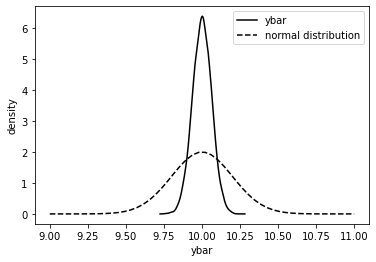

In [15]:
# create graph:
plt.plot(kde.support, kde.density, color='black', label='ybar')
plt.plot(x_range, y, linestyle='--', color='black', label='normal distribution')
plt.ylabel('density')
plt.xlabel('ybar')
plt.legend()
#plt.savefig('images/simulated-density.png')
plt.show()
plt.close()

In [16]:
# Set the random seed:
np.random.seed(666)

# Set sample size:
n = 100

# Set MC simulations
r = 10000

In [17]:
# Initialize arrays to later store results:
CIlower = np.empty(r)
CIupper = np.empty(r)
pvalue1 = np.empty(r)
pvalue2 = np.empty(r)

In [18]:
# Create for loop repeat r times:
for j in range(r):
    # draw a sample:
    sample = stats.norm.rvs(10, 2, size = n)
    sample_mean = np.mean(sample)
    sample_sd = np.std(sample, ddof = 1)
    
    # Test the correct null hypothesis mu = 10:
    testres1 = stats.ttest_1samp(sample, popmean = 10)
    pvalue1[j] = testres1.pvalue
    cv = stats.t.ppf(0.975, df = n - 1)
    CIlower[j] = sample_mean - cv * sample_sd / np.sqrt(n)
    CIupper[j] = sample_mean + cv * sample_sd / np.sqrt(n)
    
    # Test the incorrect null hypothesis mu = 9.5:
    testres2 = stats.ttest_1samp(sample, popmean = 9.5)
    pvalue2[j] = testres2.pvalue

# Test result as logical value:
reject1 = pvalue1 <= 0.05
count1_true = np.count_nonzero(reject1)
count1_false = r - count1_true
print(f'Reject the True Null Hypothesis: {count1_true}\n')
print(f'Reject the False Null Hypothesis: {count1_false}\n')

reject2 = pvalue2 <= 0.05
count2_true = np.count_nonzero(reject2)
count2_false = r - count2_true
print(f'Reject the True Null Hypothesis: {count2_true}\n')
print(f'Reject the False Null Hypothesis: {count2_false}\n')

Reject the True Null Hypothesis: 534

Reject the False Null Hypothesis: 9466

Reject the True Null Hypothesis: 6891

Reject the False Null Hypothesis: 3109



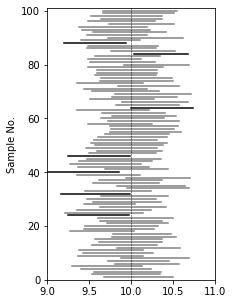

In [19]:
# Reject the correct null 
plt.figure(figsize=(3, 5))  # set figure ratio
plt.ylim(0, 101)
plt.xlim(9, 11)
for j in range(1, 101):
    if 10 > CIlower[j] and 10 < CIupper[j]:
        plt.plot([CIlower[j], CIupper[j]], [j, j], linestyle='-', color='grey')
    else:
        plt.plot([CIlower[j], CIupper[j]], [j, j], linestyle='-', color='black')
plt.axvline(10, linestyle='--', color='black', linewidth=0.5)
plt.ylabel('Sample No.')
#plt.savefig('images/simulation-inference-figure1.png')
plt.show()
plt.close()

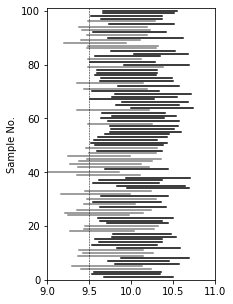

In [20]:
# Reject the incorrect null
plt.figure(figsize=(3, 5))  # set figure ratio
plt.ylim(0, 101)
plt.xlim(9, 11)
for j in range(1, 101):
    if 9.5 > CIlower[j] and 9.5 < CIupper[j]:
        plt.plot([CIlower[j], CIupper[j]], [j, j], linestyle='-', color='grey')
    else:
        plt.plot([CIlower[j], CIupper[j]], [j, j], linestyle='-', color='black')
plt.axvline(9.5, linestyle='--', color='black', linewidth=0.5)
plt.ylabel('Sample No.')
#plt.savefig('images/simulation-inference-figure2.png')
plt.show()
plt.close()